In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, metrics


np.random.seed(3)
tf.random.set_seed(3)

#ImageDataGenerator: 주어진데이터를 이용해 변형된 이미지를 만들고, 학습세트에 포함시키는 기능
# 데이터 샘플의 갯수가 부족할때 확장하여 효과적으로 사용가능
# 뇌영상은 좌우의 차이가 그렇게 중요하지 않으므로, horizontal_flip 을 사용함
train_datagen = ImageDataGenerator(rescale=1./255, #rgb는 0-255, 리스케일링으로 0-1값으로 변환
                                  horizontal_flip=True,     #수평 대칭 이미지를 50% 확률로 만들어 추가합니다.
                                  width_shift_range=0.1,  #전체 크기의 10% 범위에서 좌우로 이동합니다.
                                  height_shift_range=0.1, #마찬가지로 위, 아래로 이동합니다.
                                  #rotation_range=5,  #정해진 각도만큼 회전
                                  #shear_range=0.7,  #좌표하나를 고정시키고 다른 몇개의 좌표를 이동시키는 변환
                                  #zoom_range=[0.9, 2.2], #정해진범위안에서 확대또는 축소
                                  #vertical_flip=True, #수직대칭이미지를 50% 확률로 만들어 추가
                                  fill_mode='nearest') # 이미지를 변형할때 생기는 빈공간을 어떻게 채울지 결정, 
                                                        # nearest 선택하면 가장 비슷한 색으로 채워짐
train_generator = train_datagen.flow_from_directory(
       './train',   #학습셋이 있는 폴더의 위치입니다.
       target_size=(150, 150), #이미지의 크기
       batch_size=5,
       class_mode='binary') #치매, 정상 2진분류이므로 binary class

#테스트 셋은 이미지 부풀리기 과정을 진행하지 않습니다.
test_datagen = ImageDataGenerator(rescale=1./255)  # normaliza만 실행

test_generator = test_datagen.flow_from_directory(
       './test',   #테스트셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')


Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [2]:
x,y = train_generator.next()

(150, 150, 3)
0.0


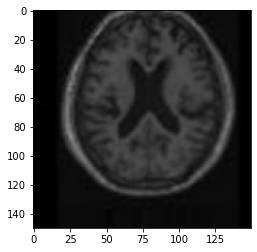

(150, 150, 3)
1.0


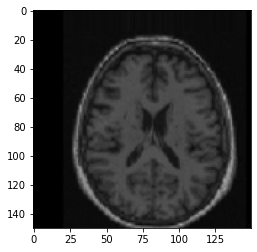

(150, 150, 3)
0.0


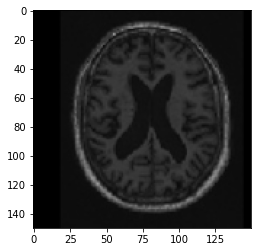

(150, 150, 3)
0.0


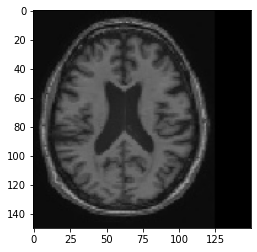

(150, 150, 3)
0.0


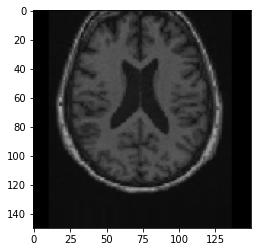

In [3]:
for idx in range(len(x)):  
    print(x[idx].shape)
    print(y[idx])
    plt.imshow(x[idx])
    plt.show()
    

In [4]:
# CNN 모델
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
# Parameter 1: 커널을 몇 개 적용할지 정함. 여러개의 커널을 적용하면 서로 다른 featuremap이 여러개 나옴. 
# Parameter 2: 커널의 크기를 정함. kernel_size=(행, 열)  
# Parameter 3: input_shape: 맨 처음 층에는 입력되는 값을 알려주어야함 input_shape=(행, 열, 색상 rbg'3' 또는 흑백 bw'1'). 
# num of para = (3*3)*32*3+32
model.add(Activation('relu'))
# Parameter 4: 활성화 함수
model.add(MaxPooling2D(pool_size=(2, 2))) #2*2에서 가장큰값을 추출

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())#활성화함수를 사용하기전에 2차원을 1차원으로 바꿔줌
# Feature Extraction -> Classification
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))# 과적합을 피하기 위해서 dropout 사용. 50% 노드를 사용
model.add(Dense(2)) #최종출력 노드의 수는 클래스 갯수와 같은 2개로
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [5]:
#모델을 컴파일 합니다. 
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

#모델을 실행
history = model.fit(
       train_generator,
       steps_per_epoch=32, 
#For example, if you have 100 training samples, then num_samples = 100, or the number of rows of x_train is 100.
#You can specify your own batch size. In this case, say batch_size = 20. 
#As a result, you can set your steps_per_epoch = 100/20 = 5 
       epochs=30, # 총 30번의 실행
       validation_data=test_generator,
       validation_steps=24)
#steps_per_epoch = TotalTrainingSamples / TrainingBatchSize
#validation_steps = TotalvalidationSamples / ValidationBatchSize

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 32 steps, validate for 24 steps
Epoch 1/30
32/32 [==============================] - 2s 71ms/step - loss: 0.6959 - accuracy: 0.5500 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 2/30
32/32 [==============================] - 1s 33ms/step - loss: 0.6931 - accuracy: 0.4875 - val_loss: 0.6813 - val_accuracy: 0.7250
Epoch 3/30
32/32 [==============================] - 1s 30ms/step - loss: 0.6896 - accuracy: 0.5250 - val_loss: 0.6769 - val_accuracy: 0.5750
Epoch 4/30
32/32 [==============================] - 1s 31ms/step - loss: 0.6785 - accuracy: 0.6250 - val_loss: 0.6620 - val_accuracy: 0.5917
Epoch 5/30
32/32 [==============================] - 1s 32ms/step - loss: 0.6620 - accuracy: 0.5750 - val_loss: 0.6749 - val_accuracy: 0.5000
Epoch 6/30
32/32 [==============================] - 1s 32ms/step - loss: 0.6486 - accuracy: 0.6313 - val_loss: 0.6616 - val_accuracy: 0.5083
Epoch 7/30
32/32 [==============================] - 1s 32ms/st

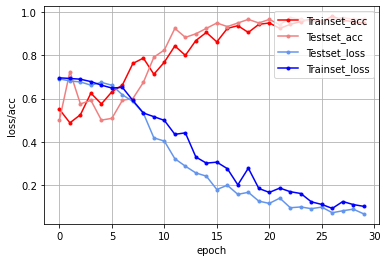

In [6]:
#결과를 그래프로 표현하는 부분입니다.
acc= history.history['accuracy'] # training
val_acc= history.history['val_accuracy'] # test
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))  
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right') 
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()
